In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)

classif_blue_1d6 = cv2.CascadeClassifier('../cascade.xml')



In [952]:

lnk="../img_testing/IMG_20201215_000939.jpg"
img_pru = cv2.imread(lnk, cv2.COLOR_RGB2BGR)

im = Image.open(lnk)
#im.show('image',im)
#type(im)
img_pru = np.asarray(im)
img_pru.shape



#gray = cv2.imread("../img_testing/IMG_20201212_120835.jpg")


(2688, 1512, 3)

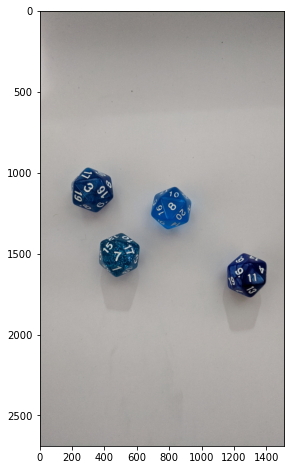

In [953]:
plt.figure(figsize=(12,8))
plt.imshow(img_pru)


In [954]:
faces = classif_blue_1d6.detectMultiScale(img_pru,scaleFactor=1.1,minNeighbors=5,flags=cv2.CASCADE_SCALE_IMAGE)
img_pru2=img_pru
# For each face
for (x, y, w, h) in faces:
    # Draw rectangle around the face
    cv2.rectangle(img_pru2, (x, y), (x+w, y+h), (0, 255, 0), 3)

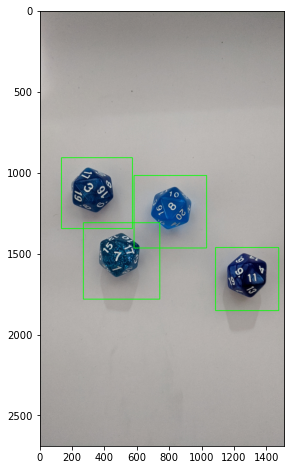

In [955]:
plt.figure(figsize=(12,8))
plt.imshow(img_pru2)


In [956]:
def segment_dices(image,regions):
    slices=[]
    
    for (x, y, w, h) in faces:
        yc=int(y+0.5*h)
        xc=int(y+0.5*w)
        h2=h//2
        w2=w//2
        # Draw rectangle around the face
        die = image[yc-h2:yc+h2,xc-w2:xc+w2,:]
        slices.append(die)
    return slices

In [957]:
def segment_dices(image,regions):
    slices=[]
    
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        die = image[y:y+h,x:x+w,:]
        die2=die[int(0.2*die.shape[0]):int(0.8*die.shape[0]),int(0.2*die.shape[1]):int(0.8*die.shape[1])]
        slices.append(die2)
    return slices

In [950]:
ss=segment_dices(img_pru,faces)

In [951]:
len(ss)

4

In [899]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import model_from_json

In [900]:
# Select color

json_file = open('../models/model_difdices_final.json', 'r')
loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("../models/model_difdices_final.h5")

In [901]:
# Different dices

json_file = open('../models/model_1d6_zoom.json', 'r')
loaded_model_json = json_file.read()
loaded_model_blue = model_from_json(loaded_model_json)

loaded_model_blue.load_weights("../models/model_1d6_zoom.h5")

json_file = open('../models/model_2d6_zoom.json', 'r')
loaded_model_json = json_file.read()
loaded_model_red = model_from_json(loaded_model_json)

loaded_model_red.load_weights("../models/model_2d6_zoom.h5")

In [902]:
def pred_dice_type(die,model):
    resized= cv2.resize(die, (50,50), interpolation = cv2.INTER_AREA) 
    dice_type=model.predict_classes( np.array( [resized,] ))  
    return dice_type


def get_score(die,model):
    labels=[5, 1, 4, 3, 6, 2]
    resized= cv2.resize(die, (100,100), interpolation = cv2.INTER_AREA)
    print(model.predict( np.array( [resized,] )))
    score = labels[model.predict_classes( np.array( [resized,] )  )[0]]
    return score

def predict_dice_score(die,model,model_red,model_blue):
    dt=pred_dice_type(die,model)
    if dt==0:
        color="red"
        score=get_score(die,model_red)
    else:
        color="blue"
        score=get_score(die,model_blue)
    return score,color

In [903]:
for dice in ss:
    print(predict_dice_score(dice,loaded_model,loaded_model_red,loaded_model_blue))

[[1.8887957e-25 0.0000000e+00 5.2210704e-30 0.0000000e+00 1.0000000e+00
  4.7620412e-23]]
(6, 'blue')
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.8409603e-25 0.0000000e+00
  0.0000000e+00]]
(1, 'blue')
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 5.2362123e-29 1.4549222e-19
  2.5869175e-36]]
(4, 'red')
[[5.7504366e-09 9.9996698e-01 7.4051769e-08 1.4982352e-09 2.3584519e-14
  3.2925316e-05]]
(1, 'red')


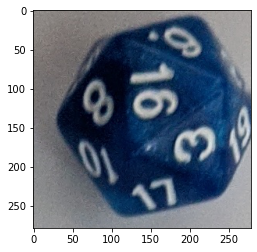

In [922]:
plt.imshow(ss[0])

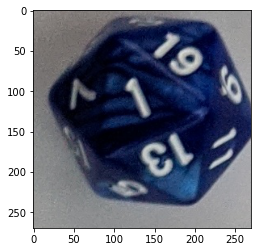

In [927]:
plt.imshow(ss[1])

In [924]:
#IMG_20201214_225808.jpg  red-OK blue-OK -sin brillos  
#IMG_20201214_225854.jpg  red-no blue-OK -ligero brillos  
#IMG_20201214_225908.jpg  red-OK blue-OK -sin brillos 
#IMG_20201214_225914.jpg  red-OK blue-OK -sin brillos 
#IMG_20201214_225922.jpg  red-no blue-OK -sin brillos 
#IMG_20201214_225925.jpg  red-no blue-OK -sin brillos 
#IMG_20201214_225928.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_225932.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_225936.jpg  red-OK blue-OK -sin brillo
#IMG_20201214_225939.jpg  red-OK blue-OK -sin brillo
#IMG_20201214_225944.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_225952.jpg  red-no blue-OK -sin brillos pero borrosa
#IMG_20201214_225956.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_225959.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231323.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231328.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231332.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231337.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231341.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231344.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231348.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231354.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231357.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231401.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_231406.jpg  red-OK blue-OK -sin brillos

#-------------------------------------
#IMG_20201214_124351.jpg  red-OK blue-no
#IMG_20201214_124417.jpg  red-no blue-no - brillos
#IMG_20201214_124440.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_124403.jpg  red-OK blue-OK -Alho de brillo
#IMG_20201214_124423.jpg  red-no blue-OK - Incluso con brillo importante en azul
#IMG_20201214_124450.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_124410.jpg  red-no blue-no - algo de brillos
#IMG_20201214_124436.jpg  red-OK blue-OK -sin brillos
#IMG_20201214_124455.jpg  red-OK blue-OK -sin brillos
#-----------------------------------------


In [857]:
6/9

0.6666666666666666

In [858]:
"""
while True:

    ret,frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    toy = majinBooClassif.detectMultiScale(gray,
    scaleFactor = 5,
    minNeighbors = 91,
    minSize=(70,78))

    for (x,y,w,h) in toy:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame,'Majin Boo',(x,y-10),2,0.7,(0,255,0),2,cv2.LINE_AA)

    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()
"""

"\nwhile True:\n\n    ret,frame = cap.read()\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n\n    toy = majinBooClassif.detectMultiScale(gray,\n    scaleFactor = 5,\n    minNeighbors = 91,\n    minSize=(70,78))\n\n    for (x,y,w,h) in toy:\n        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)\n        cv2.putText(frame,'Majin Boo',(x,y-10),2,0.7,(0,255,0),2,cv2.LINE_AA)\n\n    cv2.imshow('frame',frame)\n    \n    if cv2.waitKey(1) == 27:\n        break\ncap.release()\ncv2.destroyAllWindows()\n"